CBS Sport-Class Booking Tool

External Libries:

In [26]:
"""
- `datetime`: Provides classes for manipulating dates and times, including timedelta for time differences.
- `abc`: Used for creating abstract base classes to enforce method implementation in subclasses.
- `pandas`: A powerful data manipulation library used for working with dataframes and handling tabular data.
- `random`: Generates random numbers and selections, used for simulations in this project.
- `matplotlib.pyplot`: Used for creating visualizations like bar charts to represent course capacity utilization in this project.
"""

from datetime import datetime, timedelta
from abc import ABC, abstractmethod
import pandas as pd
import random
import matplotlib.pyplot as plt

User Class:

In [28]:
class User(ABC):
    """Abstract Base Class (ABC) representing a general user of the booking system
    Attributes:
        name (str): The name of the user.
        email (str): The email address of the user.
     Methods:
        display_info():
            Abstract method to be implemented by subclasses. It provides a string representation of the user's details.
        Design:
        This class is designed as a base class for different user types (e.g., Student, Admin, Instructor) and uses
        the `abc.ABC` module to enforce the implementation of `display_info` in all subclasses. It helps to define a 
        common interface for all user types."""
    def __init__(self, name, email):
        """Initialize the User class with a name and email"""
        self.name = name
        self.email = email

    @abstractmethod
    def display_info(self):
        pass

Student Class (inheriting from User):

In [30]:
class Student(User):
    """Represents a student user who can enroll in courses.
    Attributes:
        enrolled_courses (list): A list of courses in which the student is enrolled.
    Methods:
        display_info():
            Returns a formatted string with the student's details and enrolled courses.
        enroll_in_course(course):
            Adds a course to the student's list of enrolled courses.
    Usage of `super()`:
        This class inherits from the `User` class and uses `super()` to call the parent class constructor.
        This ensures that common attributes (`name`, `email`) are initialized in the `User` class, maintaining 
        consistency and avoiding redundancy in subclass initialization."""
    def __init__(self, name, email):
        """Initialize a Student object with a name, email, and an empty list of enrolled courses."""
        super().__init__(name, email)
        self.enrolled_courses = []  # List of enrolled courses

    def display_info(self):
        return f"Student: {self.name}, Email: {self.email}, Enrolled Courses: {self.enrolled_courses}"

    def enroll_in_course(self, course):
        self.enrolled_courses.append(course)

Admin Class (inheriting from User):

In [32]:
class Admin(User):
    """Represents an admin user who can manage courses.
    Methods:
        display_info():
            Returns a formatted string with the admin's details.
        add_course(course, courses):
            Adds a course to the system's course list.
        remove_course(course_name, courses):
            Removes a course from the system's course list based on its name. 
            Also modifies the 'courses' list in-place by filtering out the specified course
        Usage of `super()`:
            The Admin class inherits from the `User` class and uses `super()` to initialize the common attributes 
            (`name`, `email`) in the parent class. This promotes code reuse and ensures that any changes to the 
            parent class constructor are automatically reflected in the child classes."""

    def __init__(self, name, email):
        """Initialize an Admin object with a name and email."""
        super().__init__(name, email)

    def display_info(self):
        return f"Admin: {self.name}, Email: {self.email}"

    def add_course(self, course, courses):
        courses.append(course)

    def remove_course(self, course_name, courses):
        courses[:] = [course for course in courses if course.name != course_name]

Instructor Class (inheriting from User):

In [34]:
class Instructor(User):
    """Represents an instructor who teaches courses in the system.
    Attributes:
        expertise (str): The specific sport or area of expertise the instructor specializes in.
        courses (list): A list of courses that the instructor is assigned to teach.
    Methods:
        assign_course(course):
            Assigns a course to the instructor's list of courses.
        display_info():
            Returns a formatted string with the instructor's details, expertise, and the names of the courses they teach.
    Usage of `super()`:
        This class inherits from the `User` abstract base class and uses `super()` to initialize the
        common attributes (`name`, `email`) in the parent class. This ensures that the instructor
        class adheres to the structure of the `User` class while adding specific functionality and attributes
        relevant to instructors."""
    def __init__(self, name, email, expertise):
        super().__init__(name, email)
        self.expertise = expertise  # Specific sports expertise
        self.courses = []  # Courses they teach

    def assign_course(self, course):
        self.courses.append(course)

    def display_info(self):
        return f"Instructor: {self.name}, Expertise: {self.expertise}, Courses: {[course.name for course in self.courses]}"

Course Class:

In [36]:
class Course:
    """Represents a course offered in the system.
    Attributes:
        name (str): The name of the course (e.g., "Basketball Beginner").
        level (str): The skill level of the course (e.g., "Beginner" or "Intermediate").
        sport_type (str): The type of sport or activity the course is associated with (e.g., "Basketball").
        instructor (Instructor): The instructor assigned to teach the course.
        schedule (datetime): The date and time when the course is scheduled to take place.
        max_capacity (int): The maximum number of students that can enroll in the course.
        enrolled_students (list): A list of students currently enrolled in the course.
        address (str): The location where the course takes place.
    Properties:
        available_slots (int):
            Calculates and returns the number of remaining slots available for enrollment. 
            It does so by reducing each classes maximum capacity with the enrolled students.
    Methods:
        enroll_student(student):
            Enrolls a student in the course if there are available slots. Raises a ValueError if the course is fully booked.
        __repr__():
            Provides a string representation of the course details, including name, level, sport, instructor, schedule,
            capacity, available slots, and address.
    """
    def __init__(self, name, level, sport_type, instructor, schedule, max_capacity, address):
        """Initialize a Course object with relevant details."""
        self.name = name
        self.level = level  # Beginner or Intermediate
        self.sport_type = sport_type
        self.instructor = instructor
        self.schedule = schedule  # datetime object representing course timing
        self.max_capacity = max_capacity
        self.enrolled_students = []
        self.address = address  # Address where the course takes place

    @property
    def available_slots(self):
        return self.max_capacity - len(self.enrolled_students)

    def enroll_student(self, student):
        """ Args:student (Student): The student object to enroll in the course.
        Raises: ValueError: If the course is fully booked and no slots are available."""
        if self.available_slots > 0:
            self.enrolled_students.append(student)
            student.enroll_in_course(self.name)
        else:
            raise ValueError("Course is fully booked!")

    def __repr__(self):
        return (f"Course: {self.name}, Level: {self.level}, Sport: {self.sport_type}, "
                f"Instructor: {self.instructor.name}, Schedule: {self.schedule}, "
                f"Capacity: {self.max_capacity}, Available: {self.available_slots}, Address: {self.address}")

This section initializes the key data structures and functions for the course booking system and returns the course data:

In [38]:
"""
- `sports`: A list of available sports for which courses will be created.
- `levels`: Skill levels for courses (e.g., Beginner and Intermediate).
- `addresses`: A dynamically generated list of unique sport center names to assign to courses.
- `capacities`: A dictionary mapping each sport to its maximum capacity for participants."""

sports = ["Basketball", "Soccer", "Tennis", "Swimming", "Volleyball", "Yoga", "Boxing", "Running", "Cycling", "Martial Arts"]
levels = ["Beginner", "Intermediate"]
addresses = [f"Sport Center {i}" for i in range(1, 21)]
capacities = {"Basketball": 25, "Soccer": 25, "Tennis": 8, "Swimming": 20, "Volleyball": 25,
              "Yoga": 12, "Boxing": 12, "Running": 40, "Cycling": 40, "Martial Arts": 20}

ADDRESS = "Copenhagen Sports Arena"

def create_instructors(sports):
    """
    Create a list of instructor objects, one for each sport.
    Args: sports (list): A list of sports for which instructors will be created.
    Returns: list: A list of `Instructor` objects, each assigned to a specific sport.
    """
    return [Instructor(name=f"Instructor {i+1}", email=f"instructor{i+1}@sports.com", expertise=sport) for i, sport in enumerate(sports)]

def create_courses(sports, instructors, start_date, num_weeks=52):
    """Create a list of courses with a fixed schedule for each sport.
    Args:
        sports (list): A list of sports for which courses will be created.
        instructors (list): A list of instructor objects, each corresponding to a sport.
        start_date (datetime): The starting date for scheduling courses.
        num_weeks (int, optional): The number of weeks for which courses are scheduled. Defaults to 52.
    Returns:
        list: A list of `Course` objects representing the created courses.
    Schedule Design:
        - Each sport is assigned a fixed day and time slot (e.g., Basketball on Monday at 16:00).
        - Two classes (Beginner and Intermediate) are created for each sport, separated by an hour.
        - Courses are assigned unique sport center addresses dynamically."""
    courses = []
    """Fixed schedule: each sport gets a specific day and time slot that lies between 16-20 each day"""
    fixed_schedule = {  # Day (Monday=0) and hour (24-hour format)
        "Basketball": (0, 16),
        "Soccer": (0, 18),
        "Tennis": (1, 16),
        "Swimming": (1, 18),
        "Volleyball": (2, 16),
        "Yoga": (2, 18),
        "Boxing": (3, 16),
        "Running": (3, 18),
        "Cycling": (4, 16),
        "Martial Arts": (4, 18),
    }

    for week in range(num_weeks):
        for sport, (day, start_hour) in fixed_schedule.items():
            instructor = instructors[sports.index(sport)]

            # Beginner class
            beginner_schedule = start_date + timedelta(weeks=week, days=day, hours=(start_hour - 16))
            beginner_course = Course(
                name=f"{sport} Beginner",
                level="Beginner",
                sport_type=sport,
                instructor=instructor,
                schedule=beginner_schedule,
                max_capacity=capacities[sport],
                address=ADDRESS
            )
            courses.append(beginner_course)
            instructor.assign_course(beginner_course)

            # Intermediate class (next hour)
            intermediate_schedule = beginner_schedule + timedelta(hours=1)
            intermediate_course = Course(
                name=f"{sport} Intermediate",
                level="Intermediate",
                sport_type=sport,
                instructor=instructor,
                schedule=intermediate_schedule,
                max_capacity=capacities[sport],
                address=ADDRESS
            )
            courses.append(intermediate_course)
            instructor.assign_course(intermediate_course)

    return courses

# Generate data
"""This section generates the instructors and courses needed for the system.
- `instructors`: A list of instructors, each assigned to a specific sport.
- `start_date`: The starting date for scheduling courses.
- `courses`: A list of courses created with hardcoded schedules."""
instructors = create_instructors(sports)
start_date = datetime(2024, 12, 9, 16, 0)  # Monday, Dec 9, 2024, 4:00 PM used as a starting point for this project
courses = create_courses(sports, instructors, start_date)

# Convert courses to pandas DataFrame
"""Convert the list of courses into a pandas DataFrame for tabular representation and analysis.
The DataFrame includes the following columns:
- Name: The course name.
- Level: The skill level (e.g., Beginner, Intermediate).
- Sport: The type of sport.
- Instructor: The name of the assigned instructor.
- Schedule: The date and time of the course.
- Max Capacity: The maximum number of students allowed.
- Enrolled Students: The number of students currently enrolled.
- Available Slots: The number of slots still available (calculated dynamically).
- Address: The location where the course takes place."""
course_data = {
    "Name": [course.name for course in courses],
    "Level": [course.level for course in courses],
    "Sport": [course.sport_type for course in courses],
    "Instructor": [course.instructor.name for course in courses],
    "Schedule": [course.schedule for course in courses],
    "Max Capacity": [course.max_capacity for course in courses],
    "Enrolled Students": [len(course.enrolled_students) for course in courses],
    "Available Slots": [course.available_slots for course in courses], # Calculate available slots dynamically during DataFrame creation
    "Address": [course.address for course in courses],
}
courses_df = pd.DataFrame(course_data)

"""Add a "Bookable" column to the DataFrame. Courses are only bookable if they are within the upcoming 7 days looking from today"""
current_time = datetime.now()
one_week_later = current_time + timedelta(days=7)
courses_df["Bookable"] = courses_df["Schedule"].apply(
    lambda schedule: current_time <= schedule <= one_week_later)


"""Display the DataFrame to provide a tabular view of the courses"""
courses_df

,Name,Level,Sport,Instructor,Schedule,Max Capacity,Enrolled Students,Available Slots,Address,Bookable
0,Basketball Beginner,Beginner,Basketball,Instructor 1,2024-12-09 16:00:00,25,0,25,Copenhagen Sports Arena,False
1,Basketball Intermediate,Intermediate,Basketball,Instructor 1,2024-12-09 17:00:00,25,0,25,Copenhagen Sports Arena,False
2,Soccer Beginner,Beginner,Soccer,Instructor 2,2024-12-09 18:00:00,25,0,25,Copenhagen Sports Arena,False
3,Soccer Intermediate,Intermediate,Soccer,Instructor 2,2024-12-09 19:00:00,25,0,25,Copenhagen Sports Arena,False
4,Tennis Beginner,Beginner,Tennis,Instructor 3,2024-12-10 16:00:00,8,0,8,Copenhagen Sports Arena,False
...,...,...,...,...,...,...,...,...,...,...
1035,Running Intermediate,Intermediate,Running,Instructor 8,2025-12-04 19:00:00,40,0,40,Copenhagen Sports Arena,False
1036,Cycling Beginner,Beginner,Cycling,Instructor 9,2025-12-05 16:00:00,40,0,40,Copenhagen Sports Arena,False
1037,Cycling Intermediate,Intermediate,Cycling,Instructor 9,2025-12-05 17:00:00,40,0,40,Copenhagen Sports Arena,False
1038,Martial Arts Beginner,Beginner,Martial Arts,Instructor 10,2025-12-05 18:00:00,20,0,20,Copenhagen Sports Arena,False


Booking System Class:

In [40]:
# Booking System Class
class BookingSystem:
    """Represents the booking system for managing course bookings.
    Attributes:
        bookings (list): A list to store booking records, where each record is a dictionary containing:
            - 'student': The student who made the booking.
            - 'course': The course being booked.
            - 'timestamp': The date and time the booking was made.
     Methods:
        book_class(student, course):
            Attempts to book a class for a student, ensuring no duplicate or past bookings.
        get_bookable_courses(courses):
            Returns a list of courses within the next 7 days that have available slots.
         visualize_capacity(courses):
            Visualizes the capacity utilization for bookable courses over the next 7 days using Matplotlib."""
    def __init__(self):
        self.bookings = []  # List to store all bookings

    def book_class(self, student, course):
        """Book a class for a student if it meets the following conditions:
            - The class is not in the past.
            - The student has not already booked the same class.
            - The class has available slots.
        Args:
            student (Student): The student attempting to book the class.
            course (Course): The course the student wants to book.
        Raises:
            ValueError: If the class is in the past, already booked, or fully booked.
        """
        if datetime.now() > course.schedule:
            raise ValueError("Cannot book a class in the past!")
        if any(b['student'] == student and b['course'] == course for b in self.bookings):
            raise ValueError("Cannot book the same class twice!")
        if course.available_slots > 0:
            course.enroll_student(student)
            self.bookings.append({'student': student, 'course': course, 'timestamp': datetime.now()})
        else:
            raise ValueError("Course is fully booked!")


    def get_bookable_courses(self, courses):
        """"Retrieve a list of courses that are bookable, meaning:
            - The course is scheduled within the next 7 days.
            - The course has available slots.
        Args:
            courses (list): A list of all courses in the system.
        Returns:
            list: A filtered list of bookable courses.
        """
        return [course for course in courses if current_time <= course.schedule <= one_week_later and course.available_slots > 0]

    def visualize_capacity(self, courses):
        """Generate a bar chart visualizing the capacity utilization of bookable courses within the next 7 days.
        Args: courses (list): A list of all courses in the system.
        Displays: A bar chart showing the capacity utilization (%) for each bookable course."""
        bookable_courses = self.get_bookable_courses(courses)
        if not bookable_courses:
            print("No bookable courses available for visualization.")
            return

        data = {
            'Course Name': [course.name for course in bookable_courses],
            'Capacity Utilization (%)': [
                100 * (course.max_capacity - course.available_slots) / course.max_capacity for course in bookable_courses
        ],
        }
        df = pd.DataFrame(data)
        df.set_index('Course Name', inplace=True)

        # Plot the data
        plt.figure(figsize=(10, 6))
        df['Capacity Utilization (%)'].plot(kind='bar', title="Class Capacity Utilization (Next 7 Days)")
        plt.ylabel("Capacity Utilization (%)")
        plt.xlabel("Course Name")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

Simulation Function:

In [42]:
def run_simulation(courses, students, booking_system):
    """Simulate bookings for courses over a week with random student and course selections.
    Args:
        courses (list): A list of all courses in the system.
        students (list): A list of all students in the system.
        booking_system (BookingSystem): The booking system instance.
    Logs: Prints details of successful and failed bookings during the simulation."""

    if not students:
        print("No students available for simulation.")
        return

    print("Starting simulation of bookings...\n")

    # Tracking simulation details
    total_bookings = 0

    for _ in range(random.randint(20, 100)):  # Simulate 20-100 bookings per day
        student = random.choice(students)
        bookable_courses = booking_system.get_bookable_courses(courses)
        if not bookable_courses:
            print("No more bookable courses available.")
            break  # Stop if no bookable courses available
        course = random.choice(bookable_courses)
        try:
            booking_system.book_class(student, course)
            total_bookings += 1
            # Real-time logging of booking details
            print(f"Booking {total_bookings}: {student.name} booked {course.name} scheduled on {course.schedule.strftime('%Y-%m-%d %H:%M')}.")
        except ValueError as e:
            # Log if booking fails
            print(f"Booking Failed: {student.name} could not book {course.name}. Reason: {e}")

    print("\nSimulation completed.")
    print(f"Total successful bookings: {total_bookings}")

Sorting Algorithm

In [44]:
def merge_sort_courses(courses, key):  
    # Check if the list has more than one element  
    if len(courses) > 1:  
        # Find the midpoint of the list  
        mid = len(courses) // 2  
        
        # Divide the list into two halves  
        left_half = courses[:mid]   # Left half  
        right_half = courses[mid:]  # Right half  

        # Recursively sort each half  
        merge_sort_courses(left_half, key)  # Sort the left half  
        merge_sort_courses(right_half, key)  # Sort the right half  

        # Initialize indices for merging  
        i = j = k = 0  

        # Merge the sorted halves back into the original list  
        while i < len(left_half) and j < len(right_half):  
            # Compare the current elements of both halves using the provided key  
            if key(left_half[i]) <= key(right_half[j]):  
                courses[k] = left_half[i]  # Take from left_half if it's smaller or equal  
                i += 1  # Move to the next element in left_half  
            else:  
                courses[k] = right_half[j]  # Take from right_half otherwise  
                j += 1  # Move to the next element in right_half  
            k += 1  # Move to the next position in the sorted list  

        # Copy any remaining elements from left_half, if any  
        while i < len(left_half):  
            courses[k] = left_half[i]  # Copy remaining element  
            i += 1  # Move to the next element in left_half  
            k += 1  # Move to the next position in the sorted list  

        # Copy any remaining elements from right_half, if any  
        while j < len(right_half):  
            courses[k] = right_half[j]  # Copy remaining element  
            j += 1  # Move to the next element in right_half  
            k += 1  # Move to the next position in the sorted list

User Interface

In [46]:
def simple_ui(courses, students, booking_system):
    """Provide a simple console-based user interface for interacting with the booking system.
    Args:
        courses (list): A list of all courses in the system.
        students (list): A list of all students in the system.
        booking_system (BookingSystem): The booking system instance.
     Options:
        1. View bookable classes.
        2. Book a class.
        3. View booking visualizations.
        4. Search for a course by name.
        5. Exit the system.
    """
    print("Welcome to the Sports Booking System!")
    while True:
        print("\nOptions:")
        print("1. View Bookable Classes")
        print("2. Book a Class")
        print("3. View Booking Visualizations")
        print("4. Search for a Course by Name")
        print("5. Exit")


        choice = input("Enter your choice: ")
        if choice == "1":
            bookable_courses = booking_system.get_bookable_courses(courses)
            if not bookable_courses:
                print("No bookable classes available in the next 7 days.")
            else:
                print("Bookable Classes (Date, Time, Course, Available Spots):")
                for course in bookable_courses:
                    date_time = course.schedule.strftime("%Y-%m-%d %H:%M")
                    print(f"{date_time} - {course.name} - {course.available_slots} spots available")
        elif choice == "2":
            student_name = input("Enter your name: ")
            # Validate email format
            while True:
                student_email = input("Enter your CBS-email: ")
                if student_email.endswith("@student.cbs.dk"):
                    break
                else:
                    print("Invalid email. Please use your @student.cbs.dk email address")

            # Find or create the student
            student = next((s for s in students if s.name == student_name and s.email == student_email), None)
            if not student:
                student = Student(name=student_name, email=student_email)
                students.append(student)

            # Get bookable courses and sort them by availability
            bookable_courses = booking_system.get_bookable_courses(courses)
            if not bookable_courses:
                print("No bookable courses available.")
                continue

            # Sort bookable courses by available slots in ascending order
            merge_sort_courses(bookable_courses, key=lambda course: course.available_slots)

            # Display sorted courses
            print("Bookable Classes (sorted by availability, lowest to highest):")
            for idx, course in enumerate(bookable_courses):
                date_time = course.schedule.strftime("%Y-%m-%d %H:%M")
                print(f"{idx + 1}. {date_time} - {course.name} - {course.available_slots} spots available")

            # User selects a course to book
            try:
                choice = int(input("Enter the number of the course to book: ")) - 1
                if 0 <= choice < len(bookable_courses):
                    booking_system.book_class(student, bookable_courses[choice])
                    print("Booking successful!")
                else:
                    print("Invalid choice. Please select a valid course number.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")
            except Exception as e:
                print(f"Booking failed: {e}")
        elif choice == "3":
            booking_system.visualize_capacity(courses)
        elif choice == "4":  # Search for a course by name
            search_term = input("Enter the name (or part of the name) of the course you're looking for: ").lower()

            # Filter courses based on the search term (case-insensitive, partial match)
            matching_courses = [course for course in courses if search_term in course.name.lower()]

             # Further filter to include only bookable courses within the next 30 days
            current_time = datetime.now()
            one_week_later = current_time + timedelta(days=30)
            matching_courses = [course for course in matching_courses if current_time <= course.schedule <= one_week_later]

            # Sort matching courses by schedule (earliest first) and limit to the next 20 upcoming events
            matching_courses = sorted(matching_courses, key=lambda course: course.schedule)[:20]

            if not matching_courses:
                print(f"No courses found matching '{search_term}'.")
            else:
                print(f"Matching Courses (limited to the next 20 upcoming events):")
                for idx, course in enumerate(matching_courses):
                    date_time = course.schedule.strftime("%Y-%m-%d %H:%M")
                    print(f"{idx + 1}. {date_time} - {course.name} - {course.available_slots} spots available")

        elif choice == "5":
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

Main Script

Starting simulation of bookings...

Booking 1: Student 416 booked Boxing Intermediate scheduled on 2024-12-19 17:00.
Booking 2: Student 64 booked Martial Arts Beginner scheduled on 2024-12-20 18:00.
Booking 3: Student 139 booked Volleyball Intermediate scheduled on 2024-12-25 17:00.
Booking 4: Student 414 booked Tennis Beginner scheduled on 2024-12-24 16:00.
Booking 5: Student 353 booked Volleyball Intermediate scheduled on 2024-12-25 17:00.
Booking 6: Student 466 booked Running Intermediate scheduled on 2024-12-19 19:00.
Booking 7: Student 291 booked Soccer Intermediate scheduled on 2024-12-23 19:00.
Booking 8: Student 448 booked Running Intermediate scheduled on 2024-12-19 19:00.
Booking 9: Student 352 booked Martial Arts Intermediate scheduled on 2024-12-20 19:00.
Booking 10: Student 94 booked Cycling Intermediate scheduled on 2024-12-20 17:00.
Booking 11: Student 241 booked Yoga Intermediate scheduled on 2024-12-25 19:00.
Booking 12: Student 312 booked Yoga Intermediate scheduled o

Enter your choice:  2
Enter your name:  julian
Enter your CBS-email:  juhu@student.cbs.dk


Bookable Classes (sorted by availability, lowest to highest):
1. 2024-12-24 16:00 - Tennis Beginner - 5 spots available
2. 2024-12-25 19:00 - Yoga Intermediate - 6 spots available
3. 2024-12-19 16:00 - Boxing Beginner - 7 spots available
4. 2024-12-24 17:00 - Tennis Intermediate - 7 spots available
5. 2024-12-25 18:00 - Yoga Beginner - 9 spots available
6. 2024-12-19 17:00 - Boxing Intermediate - 11 spots available
7. 2024-12-20 18:00 - Martial Arts Beginner - 15 spots available
8. 2024-12-20 19:00 - Martial Arts Intermediate - 16 spots available
9. 2024-12-24 18:00 - Swimming Beginner - 17 spots available
10. 2024-12-24 19:00 - Swimming Intermediate - 18 spots available
11. 2024-12-25 17:00 - Volleyball Intermediate - 18 spots available
12. 2024-12-23 19:00 - Soccer Intermediate - 21 spots available
13. 2024-12-23 16:00 - Basketball Beginner - 23 spots available
14. 2024-12-23 17:00 - Basketball Intermediate - 24 spots available
15. 2024-12-23 18:00 - Soccer Beginner - 24 spots availa

Enter the number of the course to book:  1


Booking successful!

Options:
1. View Bookable Classes
2. Book a Class
3. View Booking Visualizations
4. Search for a Course by Name
5. Exit


Enter your choice:  3


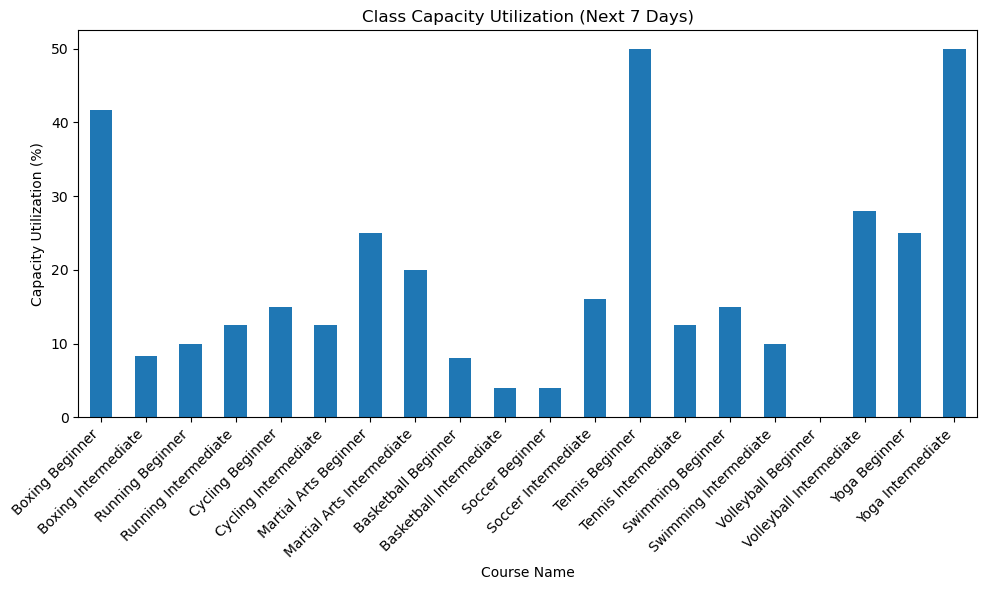


Options:
1. View Bookable Classes
2. Book a Class
3. View Booking Visualizations
4. Search for a Course by Name
5. Exit


Enter your choice:  5


Goodbye!


In [48]:
if __name__ == "__main__":
    instructors = create_instructors(sports)
    start_date = datetime(2024, 12, 9, 16, 0)  # Monday, Dec 9, 2024, 4:00 PM
    courses = create_courses(sports, instructors, start_date)
    students = [Student(name=f"Student {i+1}", email=f"student{i+1}@example.com") for i in range(500)]
    booking_system = BookingSystem()

    # Run a pre-simulation for the week
    run_simulation(courses, students, booking_system)

    # Launch UI
    simple_ui(courses, students, booking_system)